In [2]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26767 sha256=7668e583ecc353a3f61d47286d1b2121e71ed95bfbe4e0bba3ccc0aa6b961ac8
  Stored in directory: c:\users\benhamaaron\appdata\local\pip\cache\wheels\ed\8f\46\a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [1]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("7003_1.csv")
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
df.head()

C:\Users\BenhamAaron\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (25,36,39,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,asins,brand,...,upc,websiteIDs,weight
0,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
1,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
2,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
3,AVpfBXx21cnluZ0-cKxs,NaN,Zoot,...,NaN,NaN,NaN
4,AVpfEqFRLJeJML431x7w,NaN,Wild Pair,...,7.63181E+11,NaN,NaN


# CLEANING

In [3]:
df = df[[
    "id",
    "brand",
    "categories",
    "colors",
    "descriptions",
    "features",
    "merchants",
    "name",
    "prices.amountMax",
    "prices.currency",
    "prices.merchant",
    "sizes",
]]
df.head()

,id,brand,categories,...,prices.currency,prices.merchant,sizes
0,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,NaN,"10,9"
1,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"10,9"
2,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"10,9"
3,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"10,9"
4,AVpfEqFRLJeJML431x7w,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",...,USD,NaN,"8.5,7,7.5,8"


In [4]:
len(df["id"].unique())

10000

In [5]:
df = df.drop_duplicates(subset=["id"])
df.head()

,id,brand,categories,...,prices.currency,prices.merchant,sizes
0,AVpfBXx21cnluZ0-cKxs,Zoot,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,NaN,"10,9"
4,AVpfEqFRLJeJML431x7w,Wild Pair,"Shoes,Women's Shoes,Clothing,All Women's Shoes",...,USD,NaN,"8.5,7,7.5,8"
7,AVpfFCfi1cnluZ0-dcCZ,Sutton Studio,"Women's Suits & Sets,Women's Clothing,All Wome...",...,USD,Sears.com,8
9,AVpfBZCAilAPnD_xTN_K,LaLeela.com,"Women's Clothing,All Women's Clothing,Clothing...",...,USD,La Leela,NaN
11,AVpfHscY1cnluZ0-eVb6,Reebok,"Shoes,Clothing,Women's Shoes,All Women's Shoes...",...,USD,ApparelSave - Walmart.com,"5.5M,6.5M,7M,7.5M,8.5M,6M,11M,9M,10M,8M,9.5M,5..."


In [6]:
df["prices.currency"].unique()

array(['USD', 'CAD', 'AUD', 'EUR', nan, 'GBP',
       'Off Price Direct - Walmart.com', 'new'], dtype=object)

,id,brand,categories,...,prices.currency,prices.merchant,sizes
94,AVpfEsduLJeJML431ywi,Nike,"Women's Athletic Shoes,Shoes,Clothing,Women's ...",...,USD,New York Deals - Walmart.com,"10,8.5,7,7.5,9,8"
134,AVpe8h0DilAPnD_xRe3b,Nike,"Clothing, Shoes & Accessories,Athletic Apparel...",...,USD,NaN,NaN
456,AVpfDQMgilAPnD_xT2c0,Nike,"Shoes,Clothing,Women's Shoes,All Women's Shoes",...,USD,ApparelSave - Walmart.com,"10,8.5,7,9.5,7.5,9,8,11"
477,AVpfDr__ilAPnD_xUAJK,Nike,"Running Shoes,Women's Running Shoes,Running Ge...",...,USD,NaN,NaN
838,AVpe_3d11cnluZ0-boUh,Nike,"Running Shoes,Women's Running Shoes,Running Ge...",...,USD,NaN,NaN
...,...,...,...,...,...,...,...
18064,AVpfKjr6LJeJML433xMp,Nike,"Running Shoes,Athletic & Running Shoes,Women's...",...,USD,NaN,NaN
18080,AVpfN_n_1cnluZ0-gbTv,Nike,"Sporting Goods,Team Sports,Soccer,Clothing, Sh...",...,USD,NaN,NaN
18472,AVpfbdYyLJeJML439ES5,Nike,"Clothing,Shoes,Women's Shoes,Women's Athletic ...",...,USD,Shoenerds - Walmart.com,"10,6.5,7.5,8"
18793,AVpfoQT1LJeJML43AyJ_,Nike,"Women's Athletic Shoes,Shoes,Women's Shoes,Clo...",...,USD,shoezoo - Walmart.com,NaN


# ANALYSIS

## Niche

In [8]:
import json

index = 0

# example of women shoe description
print(df["descriptions"].dropna().unique()[index])

print("")

# convert dirty data into json format for simplier processing
print(json.loads(df["descriptions"].dropna().unique()[index])[0])

print("")

categories = {
    "sneaker": 0, 
    "boot" : 0, 
    "heel" : 0,
    "sandal" : 0,
    "running": 0,
}

# identify shoe categories using their URL
for i in range(10000):
    try:
        URL = json.loads(df["descriptions"].dropna().unique()[i])[0]["sourceURLs"][0].lower()
        for cat in categories.keys():
            if cat in URL:
                categories[cat] += 1
    except:
        pass
    
print(categories)

[{"dateSeen":["2016-11-11T09:49:00Z"],"sourceURLs":["https://www.walmart.com/ip/Zoot-TT-TRAINER-2.0-Women-US-9-Blue-Sneakers/51270891"],"value":"Important Made in USA Origin Disclaimer: For certain items sold by Walmart on Walmart.com, the displayed country of origin information may not be accurate or consistent with manufacturer information. For updated, accurate country of origin data, it is recommended that you rely on product packaging or manufacturer information. Brand & Style - Zoot TT Trainer 2.0 Width - Medium (B, M) True Color - Green Flash/Atomic Blue/Safety Yellow Outsole Material - Man-Made Heel Height - 1 Inches Brand & Style - Zoot TT Trainer 2.0 Width - Medium (B, M) True Color - Green Flash/Atomic Blue/Safety Yellow Outsole Material - Man-Made Heel Height - 1 Inches Find high-quality Zoot shoes with great prices at our store. We carry the very best shoes, boots, and sandals ranging from dress to casual to athletic while offering fast shipping to almost anywhere in the w

<BarContainer object of 5 artists>

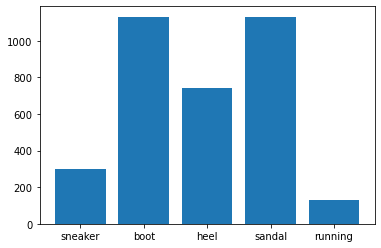

In [21]:
plt.bar(categories.keys(), categories.values())

## Specific Analysis (Nike)

In [11]:
nike_df = df.query('brand.str.lower() == "nike"')
nike_df["prices.amountMax"]

94          88
134        9.5
456        150
477         75
838         70
         ...  
18064    79.98
18080    23.99
18472       75
18793    62.05
18830    51.52
Name: prices.amountMax, Length: 209, dtype: object

In [13]:
npl = []

for item in nike_df["prices.amountMax"]:
    npl.append(float(item))

npl = sorted(npl)

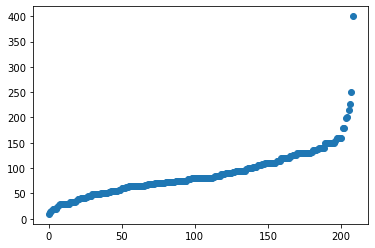

In [15]:
plt.scatter(range(len(npl)), npl)
plt.show()

(array([ 4.,  6., 11., 12., 17., 19., 28., 21., 17., 11., 13., 11., 14.,
         5.,  8.,  4.,  0.,  2.,  0.,  2.,  0.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([  9.5    ,  19.26225,  29.0245 ,  38.78675,  48.549  ,  58.31125,
         68.0735 ,  77.83575,  87.598  ,  97.36025, 107.1225 , 116.88475,
        126.647  , 136.40925, 146.1715 , 155.93375, 165.696  , 175.45825,
        185.2205 , 194.98275, 204.745  , 214.50725, 224.2695 , 234.03175,
        243.794  , 253.55625, 263.3185 , 273.08075, 282.843  , 292.60525,
        302.3675 , 312.12975, 321.892  , 331.65425, 341.4165 , 351.17875,
        360.941  , 370.70325, 380.4655 , 390.22775, 399.99   ]),
 <BarContainer object of 40 artists>)

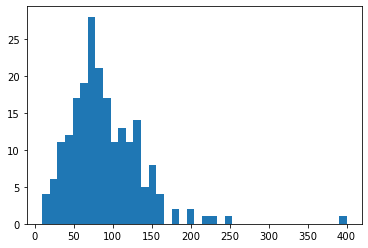

In [16]:
plt.hist(npl, bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x1839cd37250>,
 'caps': [<matplotlib.lines.Line2D at 0x1839cd37910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1839cd28eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1839cd37fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1839cd433a0>],
 'means': []}

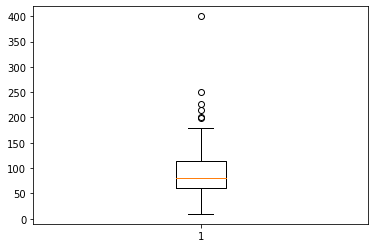

In [17]:
plt.boxplot(npl)